#Importing the Usuals

In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler , OneHotEncoder , OrdinalEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer , SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

# The Setup
Loading and merging the training datasets on the basis of ID

In [149]:
train_set = pd.read_csv('training_set.csv')
train_target = pd.read_csv('training_target.csv')
df = pd.merge(train_set, train_target, on='ID')
df_test = pd.read_csv('test_set.csv')
id = df_test['ID']
df_test = df_test.drop(columns='ID')

#Exploring the Data

In [150]:
train_set

,bill_depth,bill_length,wing_length,location,mass,sex,ID
0,14.300000,48.200000,210.000000,loc_2,4600.0,0.0,284
1,14.400000,48.400000,203.000000,loc_2,4625.0,0.0,101
2,18.400000,NaN,200.000000,loc_3,3400.0,0.0,400
3,14.982114,47.504878,NaN,NaN,4800.0,0.0,98
4,18.982114,38.259307,217.186992,loc_3,5200.0,0.0,103
...,...,...,...,...,...,...,...
430,17.000000,48.833824,196.000000,NaN,3500.0,1.0,45
431,17.100000,NaN,193.000000,loc_3,3400.0,0.0,398
432,19.400000,NaN,NaN,loc_1,3900.0,1.0,156
433,16.600000,55.512336,187.000000,loc_2,2900.0,NaN,47


In [151]:
df_test


,bill_depth,bill_length,wing_length,location,mass,sex
0,14.982114,38.259307,217.186992,loc_2,5400.0,0.0
1,13.200000,46.100000,211.000000,loc_2,4500.0,0.0
2,20.000000,NaN,197.000000,loc_3,3300.0,1.0
3,17.500000,38.791391,190.000000,loc_3,3900.0,NaN
4,18.900000,NaN,184.000000,loc_2,3550.0,1.0
...,...,...,...,...,...,...
104,19.000000,NaN,NaN,loc_1,3600.0,0.0
105,18.000000,NaN,210.000000,loc_1,4000.0,1.0
106,19.500000,49.000000,210.000000,loc_3,3950.0,1.0
107,17.900000,50.100000,190.000000,loc_3,3400.0,0.0


In [152]:
train_target

,ID,species
0,284,C
1,101,C
2,400,B
3,98,C
4,103,C
...,...,...
430,45,B
431,398,A
432,156,A
433,47,B


In [153]:
df

,bill_depth,bill_length,wing_length,location,mass,sex,ID,species
0,14.300000,48.200000,210.000000,loc_2,4600.0,0.0,284,C
1,14.400000,48.400000,203.000000,loc_2,4625.0,0.0,101,C
2,18.400000,NaN,200.000000,loc_3,3400.0,0.0,400,B
3,14.982114,47.504878,NaN,NaN,4800.0,0.0,98,C
4,18.982114,38.259307,217.186992,loc_3,5200.0,0.0,103,C
...,...,...,...,...,...,...,...,...
430,17.000000,48.833824,196.000000,NaN,3500.0,1.0,45,B
431,17.100000,NaN,193.000000,loc_3,3400.0,0.0,398,A
432,19.400000,NaN,NaN,loc_1,3900.0,1.0,156,A
433,16.600000,55.512336,187.000000,loc_2,2900.0,NaN,47,B


In [154]:
df.describe()

,bill_depth,bill_length,wing_length,mass,sex,ID
count,434.000000,295.000000,298.000000,433.000000,379.000000,435.000000
mean,17.295551,46.168221,202.759399,4290.877598,0.514512,273.767816
std,1.944587,5.056940,13.304036,793.306367,0.500450,158.447214
min,13.100000,38.259307,172.000000,2700.000000,0.000000,1.000000
25%,15.225000,43.500000,193.000000,3675.000000,0.000000,136.500000
50%,17.600000,47.500000,199.000000,4200.000000,1.000000,273.000000
75%,18.982114,48.833824,215.000000,4875.000000,1.000000,411.000000
max,21.500000,59.600000,231.000000,6300.000000,1.000000,544.000000


In [155]:
df.isnull().mean()*100

,0
bill_depth,0.229885
bill_length,32.183908
wing_length,31.494253
location,6.896552
mass,0.459770
sex,12.873563
ID,0.000000
species,0.000000


In [156]:
np.where(df.isnull().mean()*100 > 0)

(array([0, 1, 2, 3, 4, 5]),)

In [157]:
df_test.isnull().mean()*100

,0
bill_depth,0.917431
bill_length,37.614679
wing_length,34.862385
location,5.504587
mass,0.917431
sex,15.596330


In [158]:
num_cols = df.select_dtypes(include=['float64', 'int64'])
cat_cols = df.select_dtypes(include=['object'])

In [159]:
num_cols.columns

Index(['bill_depth', 'bill_length', 'wing_length', 'mass', 'sex', 'ID'], dtype='object')

In [160]:
cat_cols.columns

Index(['location', 'species'], dtype='object')

In [161]:
num_cols_test = df_test.select_dtypes(include=['float64', 'int64'])
cat_cols_test = df_test.select_dtypes(include=['object'])

# Visualising

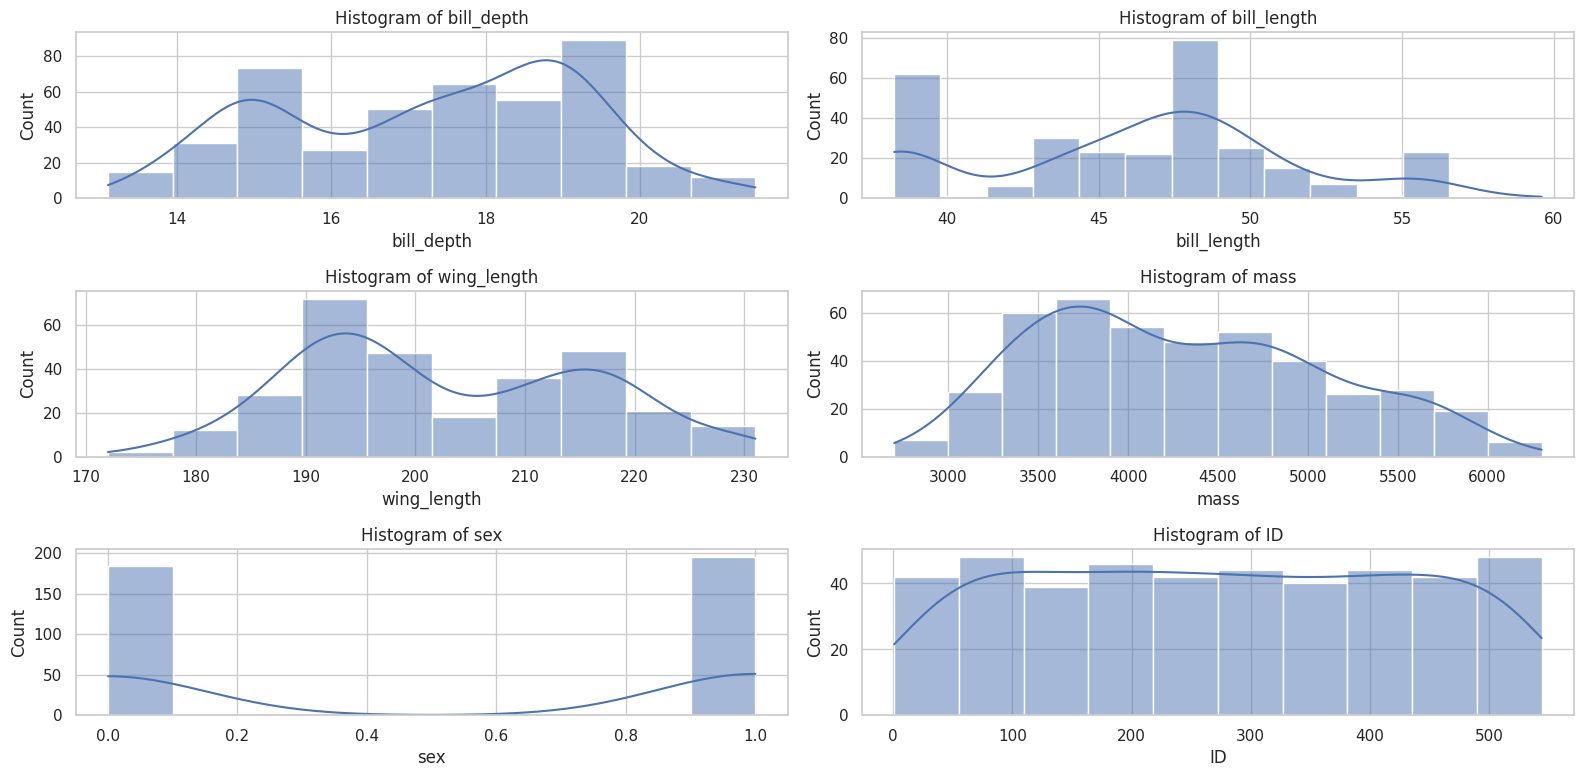

In [162]:
plt.figure(figsize=(16, 10))

for i, column in enumerate(num_cols.columns):
    plt.subplot(len(num_cols.columns)//2 + 1, 2, i + 1)
    sns.histplot(x=df[column],kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

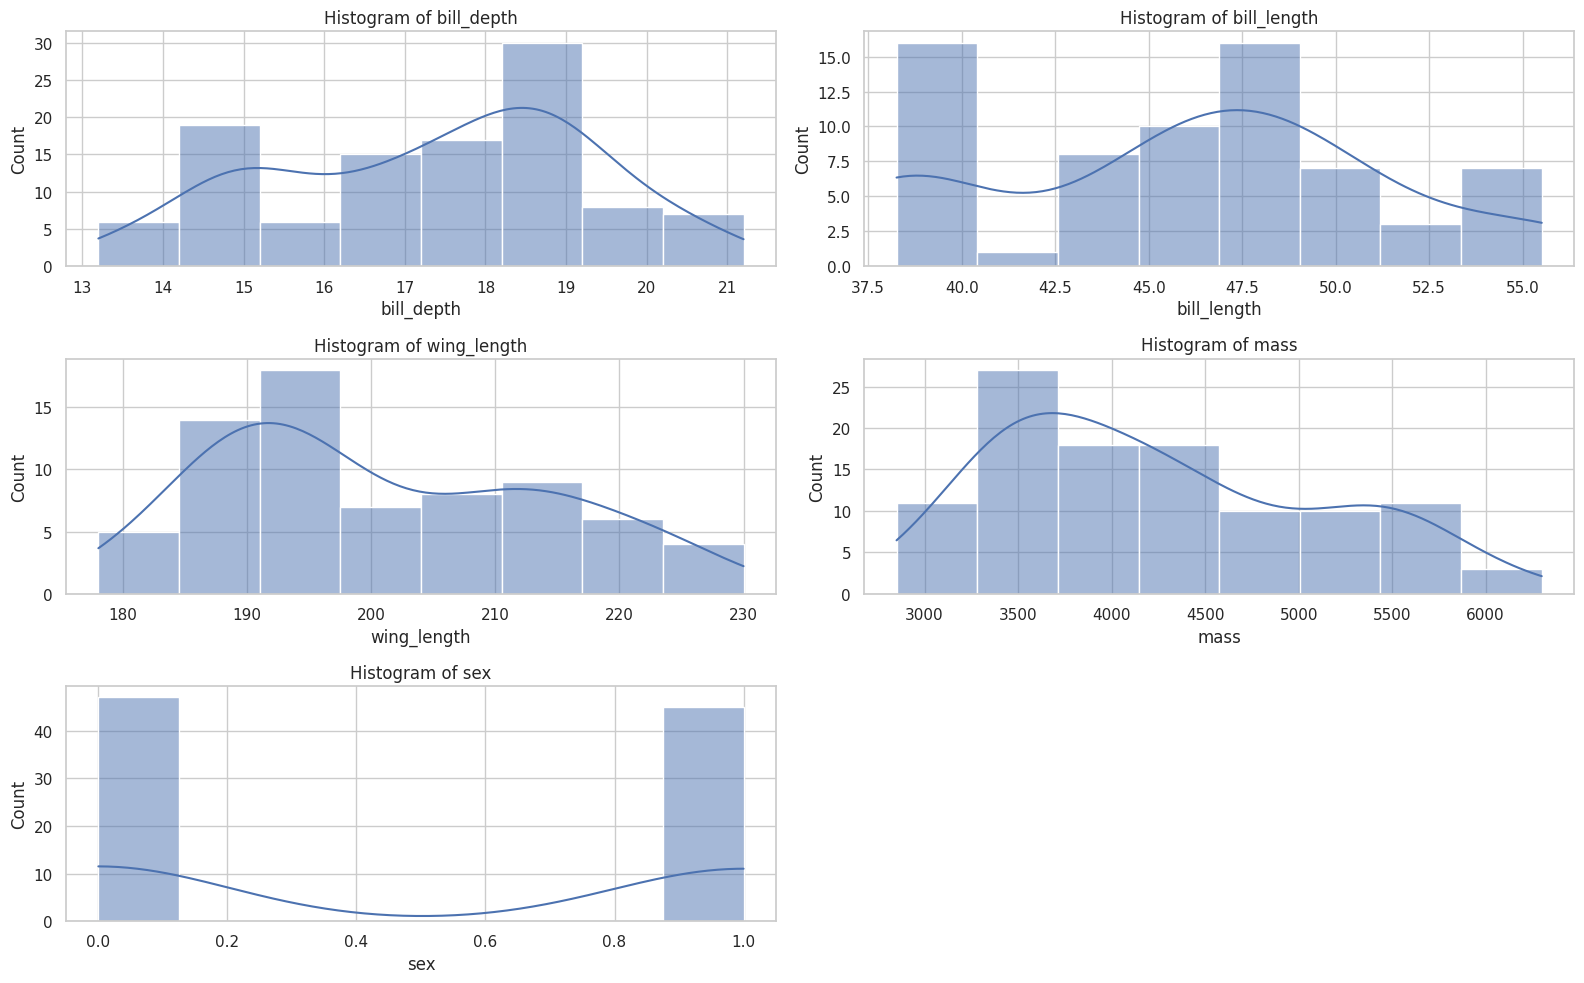

In [163]:
plt.figure(figsize=(16, 10))

for i, column in enumerate(num_cols_test.columns):
    plt.subplot(len(num_cols_test.columns)//2 + 1, 2, i + 1)
    sns.histplot(x=df_test[column],kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

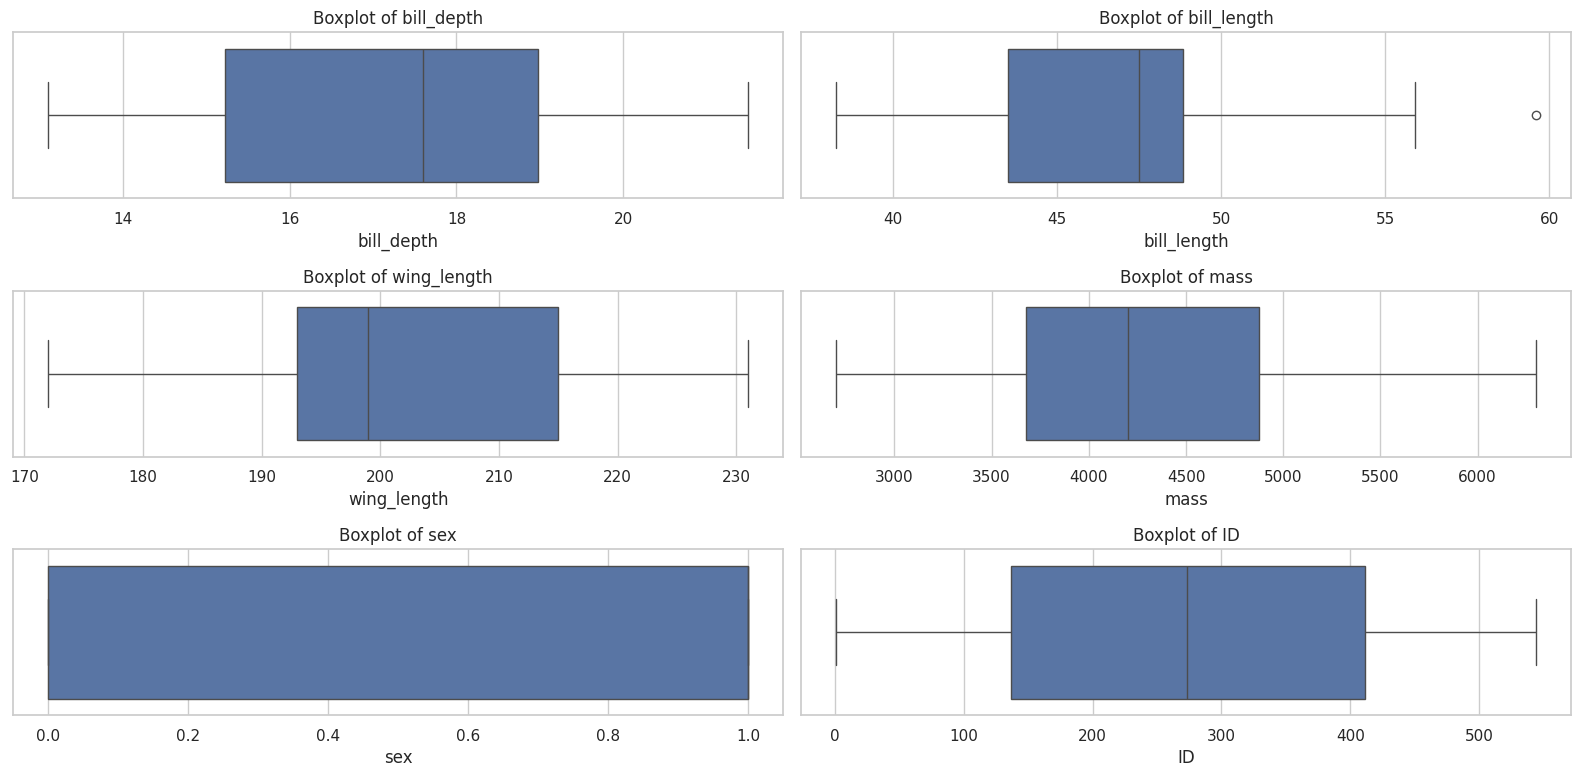

In [164]:
plt.figure(figsize=(16, 10))

for i, column in enumerate(num_cols.columns):
    plt.subplot(len(num_cols.columns)//2 + 1, 2, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

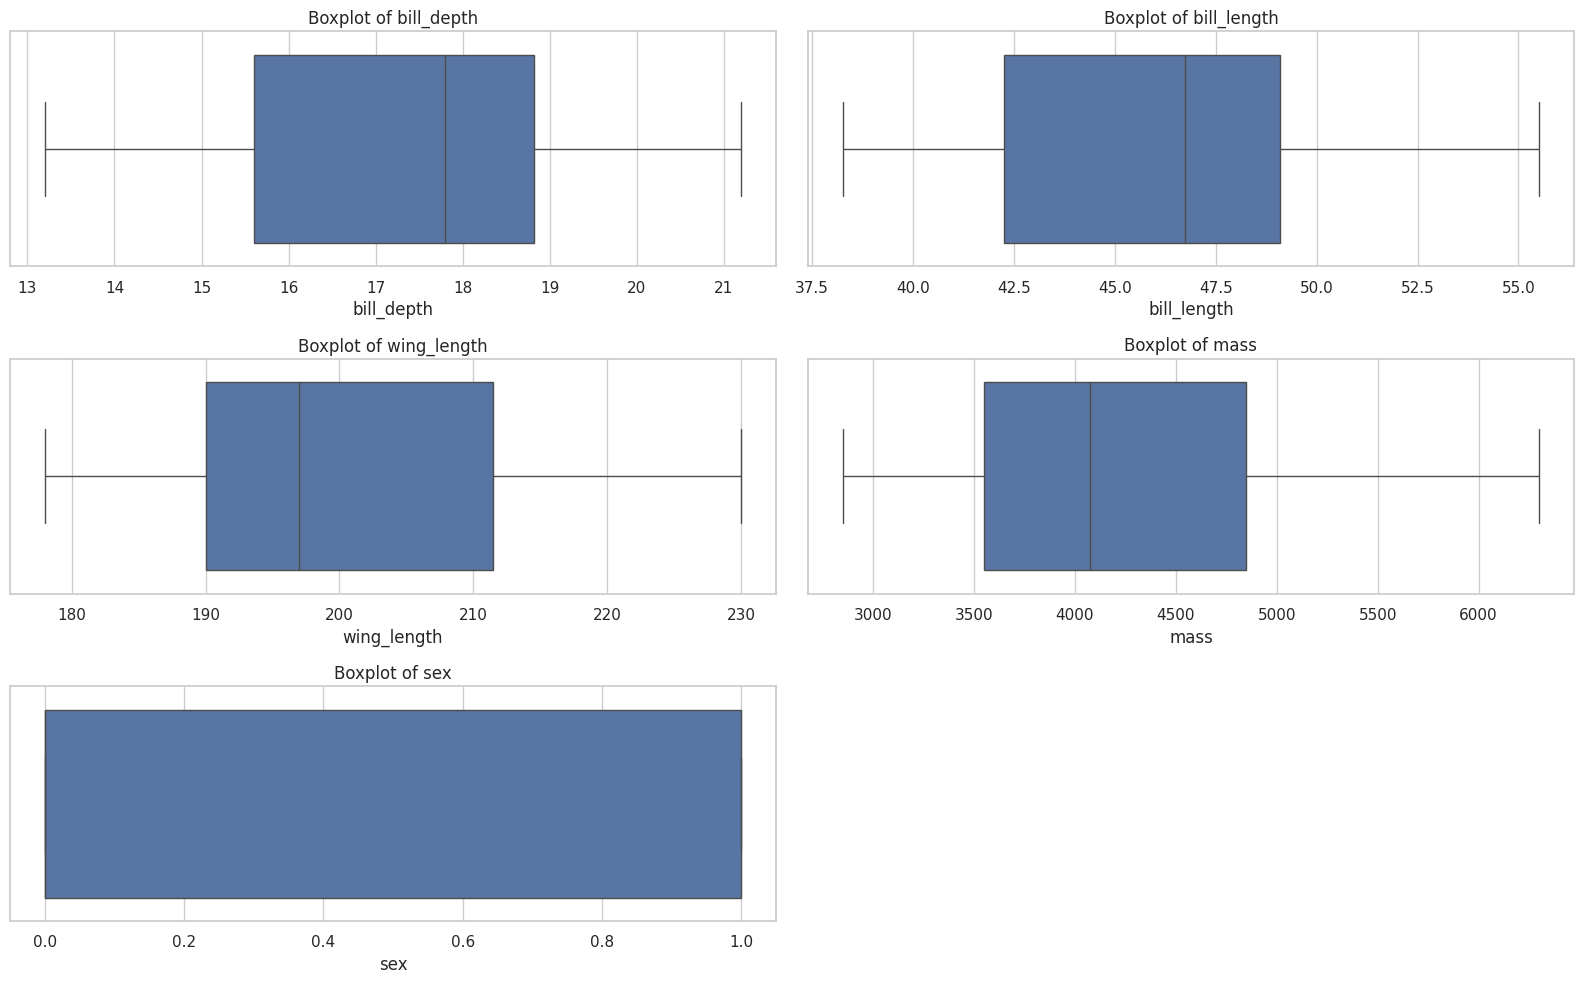

In [165]:
plt.figure(figsize=(16, 10))

for i, column in enumerate(num_cols_test.columns):
    plt.subplot(len(num_cols_test.columns)//2 + 1, 2, i + 1)
    sns.boxplot(x=df_test[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

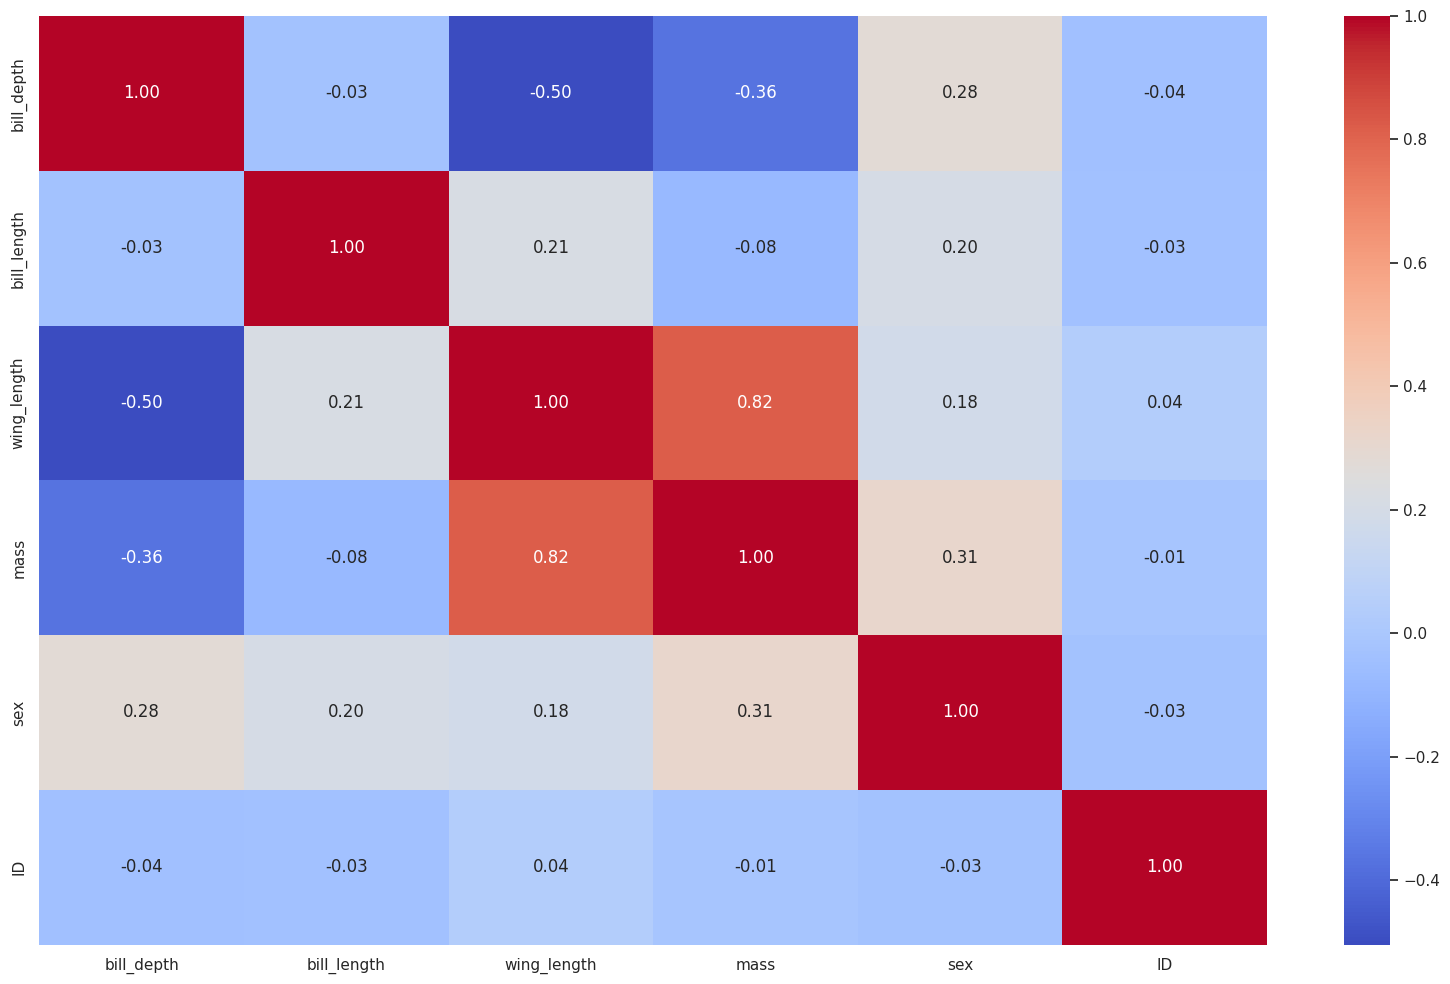

In [166]:
plt.figure(figsize=(16, 10))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

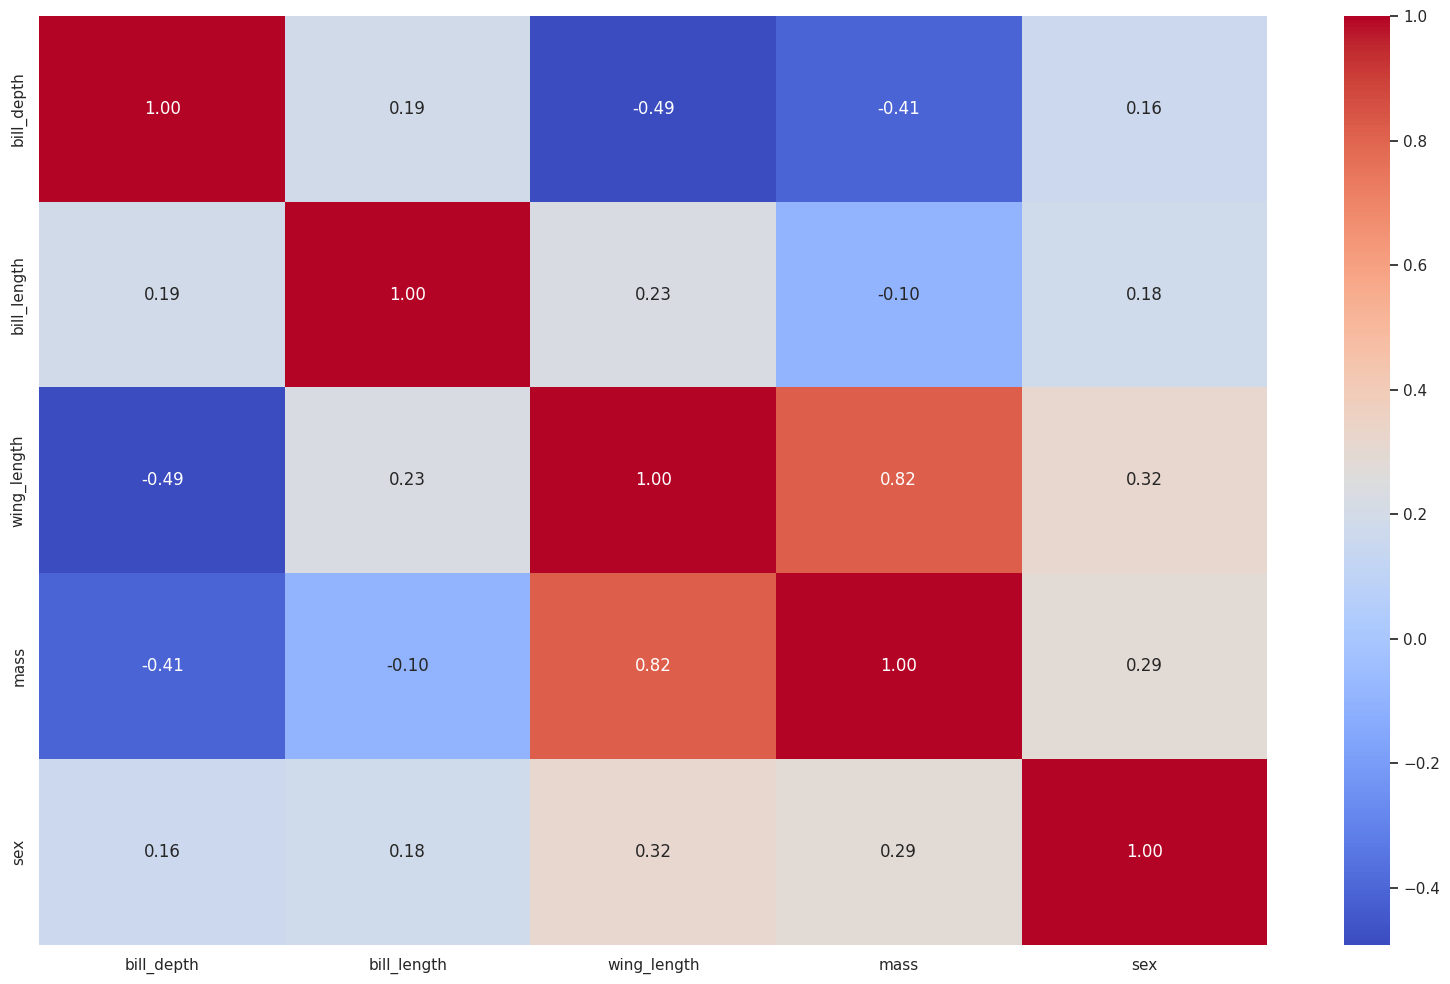

In [167]:
plt.figure(figsize=(16, 10))
sns.heatmap(num_cols_test.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

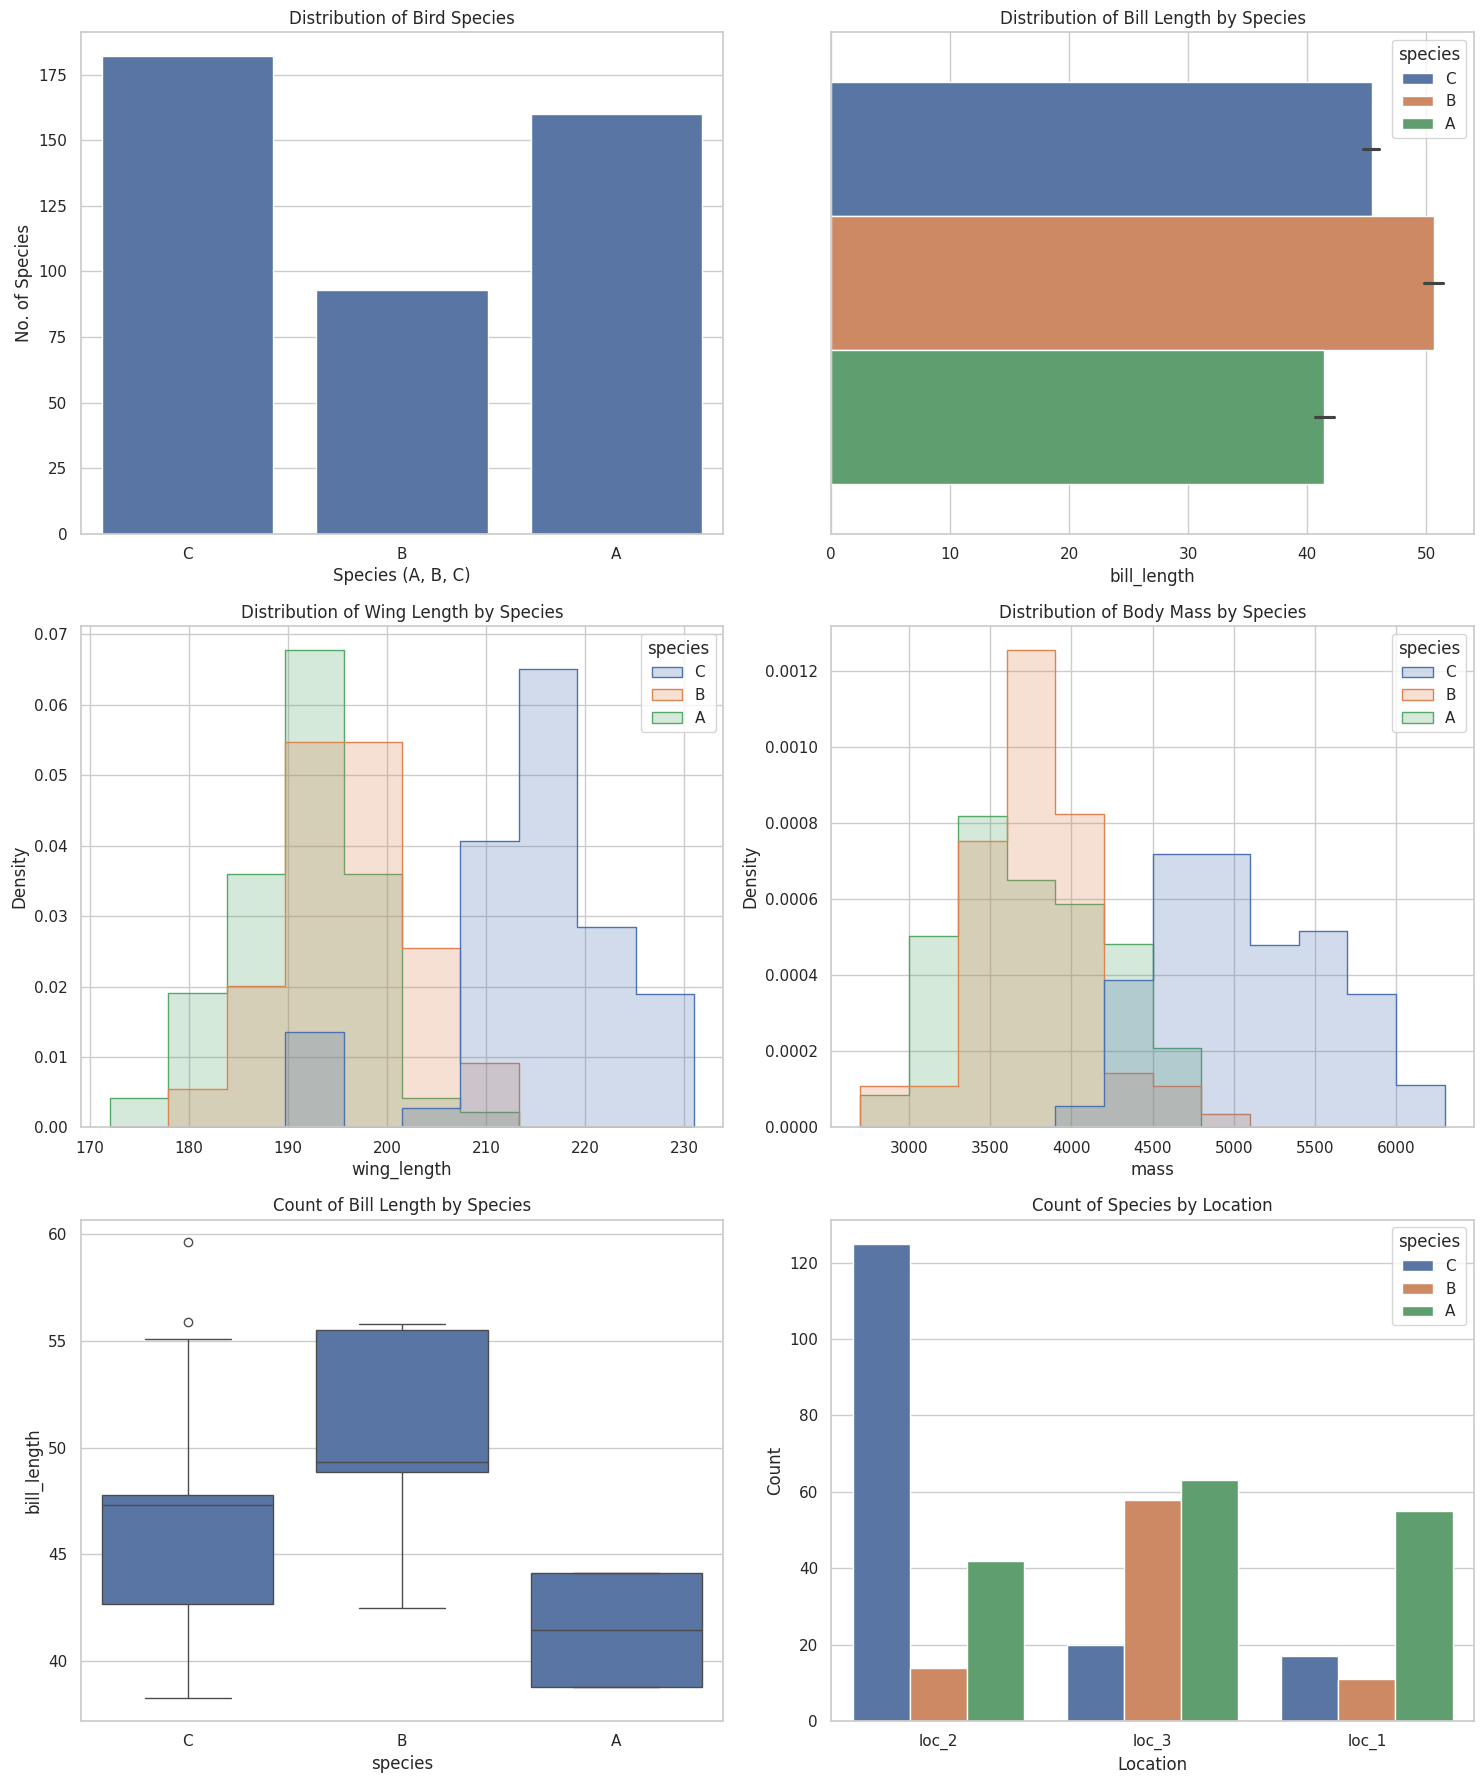

In [174]:
# Set up seaborn styling
sns.set(style='whitegrid')

# Create subplots - 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(15, 18))  # Adjust figsize to fit all subplots

# Step 2: Distribution of Species
sns.countplot(ax=axes[0, 0], x='species', data=df)
axes[0, 0].set_title('Distribution of Bird Species')
axes[0, 0].set_xlabel('Species (A, B, C)')
axes[0, 0].set_ylabel('No. of Species')

# Step 3: Distribution of Bill Length by Species
sns.barplot(ax=axes[0, 1], data=df, x='bill_length',  hue='species')
axes[0, 1].set_title('Distribution of Bill Length by Species')

# Step 4: Distribution of Wing Length by Species
sns.histplot(ax=axes[1, 0], data=df, x='wing_length', hue='species', element='step', stat='density', common_norm=False)
axes[1, 0].set_title('Distribution of Wing Length by Species')

# Step 5: Distribution of Body Mass by Species
sns.histplot(ax=axes[1, 1], data=df, x='mass', hue='species', element='step', stat='density', common_norm=False)
axes[1, 1].set_title('Distribution of Body Mass by Species')

# Step 6: Count of Bill Length by Species
sns.boxplot(ax=axes[2, 0], x='species', y='bill_length', data=df)
axes[2, 0].set_title('Count of Bill Length by Species')

# Step 7: Count of Species by Location
sns.countplot(ax=axes[2, 1], x='location', hue='species', data=df)
axes[2, 1].set_title('Count of Species by Location')
axes[2, 1].set_xlabel('Location')
axes[2, 1].set_ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Handling Missing Values

In [168]:
knn = KNNImputer(n_neighbors=5,add_indicator=True)
si = SimpleImputer(strategy='most_frequent',add_indicator=True)

In [206]:
clf = ColumnTransformer(transformers=[
    ('num', knn, ['bill_depth', 'bill_length', 'wing_length', 'mass', 'sex']),
    ('cat', si, ['location'])
],remainder='passthrough')

TypeError: unsupported operand type(s) for +: 'KNNImputer' and 'int'

In [170]:
df_trf = clf.fit_transform(df.drop(columns=['ID','species']))
df_trf_test = clf.transform(df_test)

In [171]:
df_trf = pd.DataFrame(df_trf, columns=clf.get_feature_names_out())
df_trf_test = pd.DataFrame(df_trf_test, columns=clf.get_feature_names_out())

In [172]:
df_trf.isnull().mean()*100

,0
num__bill_depth,0.0
num__bill_length,0.0
num__wing_length,0.0
num__mass,0.0
num__sex,0.0
num__missingindicator_bill_depth,0.0
num__missingindicator_bill_length,0.0
num__missingindicator_wing_length,0.0
num__missingindicator_mass,0.0
num__missingindicator_sex,0.0


In [173]:
df_trf_test.isnull().mean()*100

,0
num__bill_depth,0.0
num__bill_length,0.0
num__wing_length,0.0
num__mass,0.0
num__sex,0.0
num__missingindicator_bill_depth,0.0
num__missingindicator_bill_length,0.0
num__missingindicator_wing_length,0.0
num__missingindicator_mass,0.0
num__missingindicator_sex,0.0


# Transformations

In [211]:
for col in df_trf.select_dtypes(include=['number']).columns:
    df_trf[col] = df_trf[col].where(df_trf[col] == 0, df_trf[col] + 0.00001)
for col in df_trf_test.select_dtypes(include=['number']).columns:
    df_trf_test[col] = df_trf_test[col].where(df_trf_test[col] == 0, df_trf_test[col] + 0.00001)

In [219]:
ft = FunctionTransformer(np.log1p, validate=True, feature_names_out='one-to-one')

In [220]:
clf2 = ColumnTransformer(transformers=[
    ('num', ft, ['num__bill_depth', 'num__bill_length', 'num__wing_length', 'num__mass', 'num__sex']),
],remainder='passthrough')

In [221]:
df_trf['num__sex']

,num__sex
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
430,1.0
431,0.0
432,1.0
433,0.2


In [222]:
df_trf.isnull().mean()*100

,0
num__bill_depth,0.0
num__bill_length,0.0
num__wing_length,0.0
num__mass,0.0
num__sex,0.0
num__missingindicator_bill_depth,0.0
num__missingindicator_bill_length,0.0
num__missingindicator_wing_length,0.0
num__missingindicator_mass,0.0
num__missingindicator_sex,0.0


In [223]:
df_ft = clf2.fit_transform(df_trf)
df_ft_test = clf2.transform(df_trf_test)

In [224]:
df_ft = pd.DataFrame(df_ft, columns=clf2.get_feature_names_out())
df_ft_test = pd.DataFrame(df_ft_test, columns=clf2.get_feature_names_out())

In [225]:
df_ft

,num__num__bill_depth,num__num__bill_length,num__num__wing_length,num__num__mass,num__num__sex,remainder__num__missingindicator_bill_depth,remainder__num__missingindicator_bill_length,remainder__num__missingindicator_wing_length,remainder__num__missingindicator_mass,remainder__num__missingindicator_sex,remainder__cat__location,remainder__cat__missingindicator_location
0,2.727853,3.895894,5.351858,8.434029,0.0,0.0,0.0,0.0,0.0,0.0,loc_2,False
1,2.734368,3.89995,5.31812,8.439448,0.0,0.0,0.0,0.0,0.0,0.0,loc_2,False
2,2.965273,3.822296,5.303305,8.131825,0.0,0.0,1.0,0.0,0.0,0.0,loc_3,False
3,2.77147,3.881664,5.323192,8.47658,0.0,0.0,0.0,1.0,0.0,0.0,loc_2,True
4,2.994838,3.670189,5.385352,8.556606,0.0,0.0,0.0,0.0,0.0,0.0,loc_3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
430,2.890372,3.908694,5.283204,8.160804,0.693147,0.0,0.0,0.0,0.0,0.0,loc_2,True
431,2.895912,3.822296,5.267858,8.131825,0.0,0.0,1.0,0.0,0.0,0.0,loc_3,False
432,3.015535,3.825075,5.254561,8.268988,0.693147,0.0,1.0,1.0,0.0,0.0,loc_1,False
433,2.867899,4.034459,5.236442,7.972811,0.182322,0.0,0.0,0.0,0.0,1.0,loc_2,False


In [228]:
df_ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   num__num__bill_depth                          435 non-null    object
 1   num__num__bill_length                         435 non-null    object
 2   num__num__wing_length                         435 non-null    object
 3   num__num__mass                                435 non-null    object
 4   num__num__sex                                 435 non-null    object
 5   remainder__num__missingindicator_bill_depth   435 non-null    object
 6   remainder__num__missingindicator_bill_length  435 non-null    object
 7   remainder__num__missingindicator_wing_length  435 non-null    object
 8   remainder__num__missingindicator_mass         435 non-null    object
 9   remainder__num__missingindicator_sex          435 non-null    object
 10  re

In [231]:
clf3 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False,drop='first'), ['remainder__cat__location','remainder__cat__missingindicator_location'])
],remainder='passthrough')

In [232]:
df_final = clf3.fit_transform(df_ft)
df_final_test = clf3.transform(df_ft_test)

In [234]:
df_final = pd.DataFrame(df_final, columns=clf3.get_feature_names_out())
df_final_test = pd.DataFrame(df_final_test, columns=clf3.get_feature_names_out())

# Splitting the data

In [242]:
x = df_final
y = train_target['species']

In [243]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [244]:
y_train

,species
66,A
277,B
234,C
31,A
84,B
...,...
71,A
106,A
270,C
348,A


In [245]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
accuracy_score(y_test, y_pred)

0.9770114942528736

# Cross Validation

In [250]:
rfc = RandomForestClassifier()

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rfc, x, y, cv=kf, scoring='accuracy')

print("Cross-validation accuracy scores:", cv_scores)
print(f"Mean accuracy score: {cv_scores.mean():.4f}")
print(f"Standard deviation of accuracy scores: {cv_scores.std():.4f}")

Cross-validation accuracy scores: [0.97701149 0.98850575 0.93103448 0.91954023 0.97701149]
Mean accuracy score: 0.9586
Standard deviation of accuracy scores: 0.0278


# Submission File

In [252]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predictions = rfc.predict(df_final_test)  # Use predict() method instead of calling the model

# Assuming 'id' is defined; you need to ensure it has the same length as predictions
output = pd.DataFrame({'id': id, 'species': predictions})

# Save the output to a CSV file
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
